# 2017年-2023年南京市历史气象数据分析与可视化

一、导入数据

In [81]:
#导入必要的库
import pandas as pd

In [82]:
# 载入文本文件
df = pd.read_csv('./weather.csv', encoding='GB2312') #因为文件采用了这个编码格式

## 数据清洗

二、查看数据信息

In [83]:
#查看数据的基本信息
# 查看数据的前几行
print(df.head())
print("\n")

# 查看数据的基本统计信息
print(df.describe())

# 查看数据的列信息和数据类型
print(df.info())

          ymd  high  low tianqi fengxiang fengli    aqi aqiInfo  aqiLevel
0  2017-01-01    16   10   晴~多云       东南风   1-2级   54.0       良       2.0
1  2017-01-02    15    8     多云        北风   1-2级   92.0       良       2.0
2  2017-01-03    14    9   晴~多云        东风   1-2级  131.0    轻度污染       3.0
3  2017-01-04    15   11  小雨~中雨        东风   1-2级   75.0       良       2.0
4  2017-01-05    12   11  中雨~小雨        东风   1-2级   44.0       优       1.0


              high          low          aqi     aqiLevel
count  2556.000000  2556.000000  2494.000000  2494.000000
mean     21.625587    15.412754    53.653168     1.502807
std       9.099637     8.491219    26.835379     0.641986
min      -3.000000    -6.000000    11.000000     1.000000
25%      14.000000     8.000000    35.000000     1.000000
50%      22.000000    16.000000    47.000000     1.000000
75%      29.000000    23.000000    65.000000     2.000000
max      40.000000    31.000000   248.000000     5.000000
<class 'pandas.core.frame.DataFr

三、检查数据是否有重复值、缺失值、以及数据类型

In [84]:
# 检查重复值
duplicate_rows = df[df.duplicated()]
print("除第一次出现外的重复行")
print(duplicate_rows)

# 检查缺失值
print("缺失值情况:")
print(df.isnull().sum())

#检查数据类型
print("数据类型:")
print(df.dtypes)

除第一次出现外的重复行
Empty DataFrame
Columns: [ymd, high, low, tianqi, fengxiang, fengli, aqi, aqiInfo, aqiLevel]
Index: []
缺失值情况:
ymd           0
high          0
low           0
tianqi        0
fengxiang     0
fengli        0
aqi          62
aqiInfo      62
aqiLevel     62
dtype: int64
数据类型:
ymd           object
high           int64
low            int64
tianqi        object
fengxiang     object
fengli        object
aqi          float64
aqiInfo       object
aqiLevel     float64
dtype: object


1.并无重复行
2.存在缺失值
3.存在数据类型异常

四、缺失值处理

In [85]:
# 创建处理前的数据备份
df_original = df.copy()

# 使用中位数替换缺失的aqi值
median_aqi = df['aqi'].median()
df['aqi'] = df['aqi'].fillna(median_aqi)

# 使用众数替换缺失的aqiInfo值
mode_aqiInfo = df['aqiInfo'].mode()[0]
df['aqiInfo'] = df['aqiInfo'].fillna(mode_aqiInfo)

# 使用众数替换缺失的aqiLevel值
mode_aqiLevel = df['aqiLevel'].mode()[0]
df['aqiLevel'] = df['aqiLevel'].fillna(mode_aqiLevel)
print(df.isnull().any())

# 处理前的数据统计信息
original_stats = df_original.describe()

# 处理后的数据统计信息
processed_stats = df.describe()

# 比对处理前后的基本统计信息
compare_stats = pd.concat([original_stats, processed_stats], keys=['Original', 'Processed'], axis=1)
print(compare_stats)


ymd          False
high         False
low          False
tianqi       False
fengxiang    False
fengli       False
aqi          False
aqiInfo      False
aqiLevel     False
dtype: bool
          Original                                           Processed  \
              high          low          aqi     aqiLevel         high   
count  2556.000000  2556.000000  2494.000000  2494.000000  2556.000000   
mean     21.625587    15.412754    53.653168     1.502807    21.625587   
std       9.099637     8.491219    26.835379     0.641986     9.099637   
min      -3.000000    -6.000000    11.000000     1.000000    -3.000000   
25%      14.000000     8.000000    35.000000     1.000000    14.000000   
50%      22.000000    16.000000    47.000000     1.000000    22.000000   
75%      29.000000    23.000000    65.000000     2.000000    29.000000   
max      40.000000    31.000000   248.000000     5.000000    40.000000   

                                              
               low          a

aqiInfo与aqiLevel列为分类数据。
经缺失值处理后，aqi列整体数据分布无显著影响，所以缺失值处理成功。

五、数据类型转换

1.ymd 列 (Date Type):
原因：ymd 列包含日期信息，将其转换为日期类型 (datetime) 可以使得 Pandas 能够更好地理解和处理日期数据。


2.aqi 列 (Integer Type):
原因: aqi 列代表空气质量指数，通常是整数。将其转换为整数类型 (int64) 有助于减小内存占用，并且更符合 AQI 的定义。


3.fengli 列 (Category Type):
原因: fengli 列表示风力级别，通常也有有限的几个类别（例如 '1-2级', '3-4级' 等）。将其转换为分类类型 (category) 有助于减小内存占用，并且更适合处理有限类别的列。还可以省去之后需要提取fengli数值部分的工作量。


4.aqiInfo 列 (Category Type):
原因: aqiInfo 列表示空气质量的标签，通常有有限的几个类别（例如 '优', '良', '轻度污染' 等）。将其转换为分类类型 (category) 可以减小内存占用，并且更适合处理有限类别的列。


5.aqiLevel 列 (Category Type):
原因 : aqiLevel 列也表示空气质量的级别，通常是有限的几个类别。


6.fengxiang 列 (Category Type):
原因 : fengxiang 列表示风向，通常有有限的几个方向（例如 '东', '西', '南', '北' 等）。

In [86]:
# 转换 ymd 列为日期类型
df['ymd'] = pd.to_datetime(df['ymd'])
# 转换 aqi 列为整数类型
df['aqi'] = df['aqi'].astype('int64')
# 转换 aqiInfo、aqiLevel、fengxiang、fengli 列为分类类型
df['aqiInfo'] = df['aqiInfo'].astype('category')
df['aqiLevel'] = df['aqiLevel'].astype('category')
df['fengxiang'] = df['fengxiang'].astype('category')
df['fengli'] = df['fengli'].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ymd        2556 non-null   datetime64[ns]
 1   high       2556 non-null   int64         
 2   low        2556 non-null   int64         
 3   tianqi     2556 non-null   object        
 4   fengxiang  2556 non-null   category      
 5   fengli     2556 non-null   category      
 6   aqi        2556 non-null   int64         
 7   aqiInfo    2556 non-null   category      
 8   aqiLevel   2556 non-null   category      
dtypes: category(4), datetime64[ns](1), int64(3), object(1)
memory usage: 111.1+ KB
None


## 数据可视化与分析前的数据处理

一、温度趋势图数据准备

### 2017年四个季度每天的温度数据

In [87]:
# 创建新列year和quarter，以便后续对数据进行分组
df['year'] = df['ymd'].dt.year
df['quarter'] = df['ymd'].dt.quarter
# 选择 DataFrame 中的特定列：ymd、high、low、year、quarter
df_temp = df[['ymd', 'high', 'low', 'year', 'quarter']]
df_temp

,ymd,high,low,year,quarter
0,2017-01-01,16,10,2017,1
1,2017-01-02,15,8,2017,1
2,2017-01-03,14,9,2017,1
3,2017-01-04,15,11,2017,1
4,2017-01-05,12,11,2017,1
...,...,...,...,...,...
2551,2023-12-27,14,4,2023,4
2552,2023-12-28,14,7,2023,4
2553,2023-12-29,12,8,2023,4
2554,2023-12-30,11,5,2023,4


In [88]:
# 获取2017年各个季度的温度数据，并整理数据，选择日期作为横轴，平均高温和低温作为纵轴

# 2017年第一季度
df_temp_2017_q1 = df_temp[(df_temp['quarter'] == 1) & (df_temp['year'] == 2017)]
df_temp_2017_q1 = df_temp_2017_q1[['ymd', 'high', 'low']]
# 2017年第二季度
df_temp_2017_q2 = df_temp[(df_temp['quarter'] == 2) & (df_temp['year'] == 2017)]
df_temp_2017_q2 = df_temp_2017_q2[['ymd', 'high', 'low']]
# 2017年第三季度
df_temp_2017_q3 = df_temp[(df_temp['quarter'] == 3) & (df_temp['year'] == 2017)]
df_temp_2017_q3 = df_temp_2017_q3[['ymd', 'high', 'low']]
# 2017年第四季度
df_temp_2017_q4 = df_temp[(df_temp['quarter'] == 4) & (df_temp['year'] == 2017)]
df_temp_2017_q4 = df_temp_2017_q4[['ymd', 'high', 'low']]

### 2017-2023年的历史温度数据

In [89]:
df_temp

,ymd,high,low,year,quarter
0,2017-01-01,16,10,2017,1
1,2017-01-02,15,8,2017,1
2,2017-01-03,14,9,2017,1
3,2017-01-04,15,11,2017,1
4,2017-01-05,12,11,2017,1
...,...,...,...,...,...
2551,2023-12-27,14,4,2023,4
2552,2023-12-28,14,7,2023,4
2553,2023-12-29,12,8,2023,4
2554,2023-12-30,11,5,2023,4


### 2017年-2023年平均最高气温和最低气温柱状图

In [90]:
# 分组并计算每个组的最高温度和最低温度的平均值
df_avg_temp_yearly_quarterly = df.groupby(['year', 'quarter']).agg({'high': 'mean', 'low': 'mean'}).reset_index()
df_avg_temp_yearly_quarterly

,year,quarter,high,low
0,2017,1,11.955556,5.822222
1,2017,2,25.582418,18.428571
2,2017,3,32.423913,26.054348
3,2017,4,16.619565,11.260870
4,2018,1,11.200000,5.200000
5,2018,2,26.109890,18.857143
6,2018,3,31.652174,25.782609
7,2018,4,17.369565,11.880435
8,2019,1,11.544444,6.111111
9,2019,2,25.406593,17.956044


二、天气频率图数据准备

In [91]:
# 选择 DataFrame 中的特定列：ymd、year、quarter、tianqi
df_weatherCondition = df[['ymd','year', 'quarter','tianqi']]

### 2018年第一季度天气状况出现频率

In [92]:
# 筛选出2018年第一季度的数据
df_weatherCondition_2018_q1 = df_weatherCondition[(df_weatherCondition['year'] == 2018) & (df_weatherCondition['quarter'] == 1)]
df_weatherCondition_2018_q1

,ymd,year,quarter,tianqi
365,2018-01-01,2018,1,晴
366,2018-01-02,2018,1,阴~小雨
367,2018-01-03,2018,1,小雨~中雨
368,2018-01-04,2018,1,中雨~小雨
369,2018-01-05,2018,1,阴~多云
...,...,...,...,...
450,2018-03-27,2018,1,晴~多云
451,2018-03-28,2018,1,晴
452,2018-03-29,2018,1,阴
453,2018-03-30,2018,1,多云


In [93]:
# 统计每种天气类型的出现次数
weatherCondition_counts_2018_q1 = df_weatherCondition_2018_q1['tianqi'].value_counts()
weatherCondition_counts_2018_q1

tianqi
晴         15
小雨        15
多云        14
晴~多云      10
小雨~多云      6
阴~多云       6
多云~晴       4
多云~小雨      4
阴~小雨       3
小雨~中雨      3
中雨~小雨      2
小雨~晴       1
阴~雨夹雪      1
小雪~中雪      1
多云~雨夹雪     1
雨夹雪~阴      1
晴~阴        1
多云~中雨      1
阴          1
Name: count, dtype: int64

### 每年不同天气类型（持续型&间歇型）出现的频率

In [94]:
# 通过对 'tianqi' 列进行处理，根据是否包含 '~' 符号，确定天气类型为 '持续型' 或 '间歇型'，将结果添加到新的 'weather_type' 列中
df['weatherType'] = df['tianqi'].apply(lambda x: '持续型' if '~' not in x else '间歇型')

In [95]:
# 按照 'year' 和 'weather_type' 列进行分组，统计每组的数量，并将结果形成新的 DataFrame，未命中值填充为 0
df_weatherType_yearly = df.groupby(['year', 'weatherType']).size().unstack(fill_value=0)
df_weatherType_yearly

weatherType,持续型,间歇型
year,,
2017,146,219
2018,177,188
2019,165,200
2020,135,231
2021,125,240
2022,119,246
2023,117,248


### 2017-2023年天气状况出现频率

In [96]:
# 统计每种天气状况的出现次数
weatherCondition_counts = df['tianqi'].value_counts()
weatherCondition_counts

tianqi
多云         380
小雨         218
晴          212
多云~阴       179
阴~多云       171
          ... 
特大暴雨~多云      1
雨夹雪~晴        1
雨夹雪~阴        1
中雨~暴雨        1
暴雨~多云        1
Name: count, Length: 69, dtype: int64

三、风向与风力等级数据处理

In [97]:
# 选择 DataFrame 中的特定列：ymd、year、fengli、fengxiang
df_wind = df[['ymd','year','fengli','fengxiang']]
df_wind

,ymd,year,fengli,fengxiang
0,2017-01-01,2017,1-2级,东南风
1,2017-01-02,2017,1-2级,北风
2,2017-01-03,2017,1-2级,东风
3,2017-01-04,2017,1-2级,东风
4,2017-01-05,2017,1-2级,东风
...,...,...,...,...
2551,2023-12-27,2023,1级,东南风
2552,2023-12-28,2023,2级,北风
2553,2023-12-29,2023,2级,东风
2554,2023-12-30,2023,2级,西风


### 2019年风力统计

In [98]:
# 提取2019年的风力风向数据
df_wind_2019 = df_wind[df_wind['year'] == 2019]

# 统计2019年每种风向出现的次数
windDirection_counts_2019 = df_wind_2019['fengxiang'].value_counts()
windDirection_counts_2019

fengxiang
东北风      160
东南风      120
西北风       55
西南风       26
东风         2
北风         1
南风         1
无持续风向      0
西风         0
Name: count, dtype: int64

### 2019年不同风向下的风力等级统计

In [99]:
#按照风向和风力两列对2019年的数据进行分组统计
windForce_windDirection_counts_2019 = df_wind_2019.groupby(['fengxiang', 'fengli']).size().unstack(fill_value=0)
windForce_windDirection_counts_2019

C:\Users\25016\AppData\Local\Temp\ipykernel_4472\4088970727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  windForce_windDirection_counts_2019 = df_wind_2019.groupby(['fengxiang', 'fengli']).size().unstack(fill_value=0)


fengli,1-2级,1级,2级,3-4级,3级,4-5级,4级,5-6级,5级,6-7级,6级,微风
fengxiang,,,,,,,,,,,,
东北风,0,2,81,0,70,0,6,0,1,0,0,0
东南风,0,0,72,0,45,0,2,0,0,0,1,0
东风,0,0,2,0,0,0,0,0,0,0,0,0
北风,0,0,0,0,1,0,0,0,0,0,0,0
南风,0,0,0,0,1,0,0,0,0,0,0,0
无持续风向,0,0,0,0,0,0,0,0,0,0,0,0
西北风,0,0,24,0,27,0,3,0,1,0,0,0
西南风,0,1,14,0,7,0,4,0,0,0,0,0
西风,0,0,0,0,0,0,0,0,0,0,0,0


### 2019年风力等级和风向的出现次数

In [100]:
cross_tab = pd.crosstab(df_wind_2019['fengxiang'], df_wind_2019['fengli'])
cross_tab

fengli,1级,2级,3级,4级,5级,6级
fengxiang,,,,,,
东北风,2,81,70,6,1,0
东南风,0,72,45,2,0,1
东风,0,2,0,0,0,0
北风,0,0,1,0,0,0
南风,0,0,1,0,0,0
西北风,0,24,27,3,1,0
西南风,1,14,7,4,0,0


四、AQI数据统计

### 2017-2023年的aqi变化图

In [101]:
# 提取 'ymd' , 'aqi','year' 列创建新的 DataFrame
df_aqi = df[['ymd','year', 'aqi','aqiInfo','aqiLevel']]
df_aqi

,ymd,year,aqi,aqiInfo,aqiLevel
0,2017-01-01,2017,54,良,2.0
1,2017-01-02,2017,92,良,2.0
2,2017-01-03,2017,131,轻度污染,3.0
3,2017-01-04,2017,75,良,2.0
4,2017-01-05,2017,44,优,1.0
...,...,...,...,...,...
2551,2023-12-27,2023,47,优,1.0
2552,2023-12-28,2023,47,优,1.0
2553,2023-12-29,2023,47,优,1.0
2554,2023-12-30,2023,47,优,1.0


### 统计 AQI 质量说明的出现次数

In [102]:
aqi_info_counts = df_aqi['aqiInfo'].value_counts()
aqi_info_counts

aqiInfo
优       1475
良        932
轻度污染     130
中度污染      14
重度污染       5
Name: count, dtype: int64

### 统计2021年不同空气质量信息出现次数

In [103]:
df_aqi_2021 = df_aqi[df_aqi['year'] ==2021]
aqi_info_counts_2021 = df_aqi_2021['aqiInfo'].value_counts()
aqi_info_counts_2021

aqiInfo
优       225
良       131
轻度污染      7
中度污染      1
重度污染      1
Name: count, dtype: int64

# 数据可视化

In [104]:
# 检查一下
df

,ymd,high,low,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,year,quarter,weatherType
0,2017-01-01,16,10,晴~多云,东南风,1-2级,54,良,2.0,2017,1,间歇型
1,2017-01-02,15,8,多云,北风,1-2级,92,良,2.0,2017,1,持续型
2,2017-01-03,14,9,晴~多云,东风,1-2级,131,轻度污染,3.0,2017,1,间歇型
3,2017-01-04,15,11,小雨~中雨,东风,1-2级,75,良,2.0,2017,1,间歇型
4,2017-01-05,12,11,中雨~小雨,东风,1-2级,44,优,1.0,2017,1,间歇型
...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2023-12-27,14,4,阴~晴,东南风,1级,47,优,1.0,2023,4,间歇型
2552,2023-12-28,14,7,晴~阴,北风,2级,47,优,1.0,2023,4,间歇型
2553,2023-12-29,12,8,晴~多云,东风,2级,47,优,1.0,2023,4,间歇型
2554,2023-12-30,11,5,阴~晴,西风,2级,47,优,1.0,2023,4,间歇型


## 1.温度分布图&温度趋势图

### 1.1 使用pyechart库完成2017年四个季度每天的温度趋势图

In [105]:
# 导入 Pyecharts库
from pyecharts.charts import Line
from pyecharts import options as opts

In [106]:
# 创建一个折线图 Line 实例
line = Line()

# 添加 x 轴数据
line.add_xaxis(df_temp_2017_q1['ymd'].dt.strftime('%Y-%m-%d').tolist())

# 添加 y 轴数据
line.add_yaxis("最高温度", df_temp_2017_q1['high'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
line.add_yaxis("最低温度", df_temp_2017_q1['low'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))

# 设置图表的标题和其他配置项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="2017年第一季度每天的温度趋势图"),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    toolbox_opts=opts.ToolboxOpts(is_show=True),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
)

# 展示图表
line.render_notebook()

结论：1.最高温度的变化幅度较大，在3℃~21℃区间浮动

      2.2017年上海的冬天并没有很冷，只有一小段天数的最低气温低于零度

      3.昼夜温度差△在1℃~16℃区间内浮动，但普遍都在4℃~8℃，佐证了上海属于亚热带季风型气候


In [107]:
# 创建一个折线图 Line 实例
line = Line()

# 添加 x 轴数据
line.add_xaxis(df_temp_2017_q2['ymd'].dt.strftime('%Y-%m-%d').tolist())

# 添加 y 轴数据
line.add_yaxis("最高温度", df_temp_2017_q2['high'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
line.add_yaxis("最低温度", df_temp_2017_q2['low'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))

# 设置图表的标题和其他配置项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="2017年第二季度每天的温度趋势图"),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    toolbox_opts=opts.ToolboxOpts(is_show=True),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
)

# 展示图表
line.render_notebook()

结论：1.最高温度的变化幅度较大,在13℃~32℃区间内浮动

    2.2017年上海直到4月中旬天气才正式转热，并逐步攀升

    3.昼夜温度差△在2℃~14℃区间内浮动，但普遍都在6℃~10℃，佐证了上海属于亚热带季风型气候


In [108]:
# 创建一个折线图 Line 实例
line = Line()

# 添加 x 轴数据
line.add_xaxis(df_temp_2017_q3['ymd'].dt.strftime('%Y-%m-%d').tolist())

# 添加 y 轴数据
line.add_yaxis("最高温度", df_temp_2017_q3['high'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
line.add_yaxis("最低温度", df_temp_2017_q3['low'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))

# 设置图表的标题和其他配置项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="2017年第三季度每天的温度趋势图"),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    toolbox_opts=opts.ToolboxOpts(is_show=True),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
)

# 展示图表
line.render_notebook()

结论：1.七月中旬开始进入到酷暑天气，但是八月份由于暴雨最高温度普遍下降了5℃

      2.2017年上海九月份的天气普遍维持在20℃~30℃的区间

      3.七八月份的昼夜温度差△基本维持在8℃~10℃


In [109]:
# 创建一个折线图 Line 实例
line = Line()

# 添加 x 轴数据
line.add_xaxis(df_temp_2017_q4['ymd'].dt.strftime('%Y-%m-%d').tolist())

# 添加 y 轴数据
line.add_yaxis("最高温度", df_temp_2017_q4['high'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
line.add_yaxis("最低温度", df_temp_2017_q4['low'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))

# 设置图表的标题和其他配置项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="2017年第四季度每天的温度趋势图"),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    toolbox_opts=opts.ToolboxOpts(is_show=True),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
)

# 展示图表
line.render_notebook()

结论：1.十月初还是迎来了秋老虎，将气温抬了上去

     2.2017年上海的秋天一如既往的短暂，符合客观事实

     3.进入11月中旬之后气温的变化幅度相对而言还是比较大的，折线图持续性的起伏


### 1.2 使用pyechart库完成2017-2023年的历史温度分布

In [110]:
from pyecharts.charts import Scatter

# 过滤数据集，选取2017-2023年的数据
x_data = df_temp['ymd'].dt.strftime('%Y-%m-%d').tolist()
y_data_low = df_temp['low'].tolist()
y_data_high = df_temp['high'].tolist()

# 创建散点图实例
scatter = Scatter(init_opts=opts.InitOpts(width="1000px", height="600px"))

# 添加 x 轴和 y 轴数据，并设置不显示标签
scatter.add_xaxis(x_data)
scatter.add_yaxis("最低气温", y_data_low, label_opts=opts.LabelOpts(is_show=False))
scatter.add_yaxis("最高气温", y_data_high, label_opts=opts.LabelOpts(is_show=False))

# 设置全局选项
scatter.set_global_opts(
    title_opts=opts.TitleOpts(title="2017-2023年历史温度分布"),
    tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
    visualmap_opts=opts.VisualMapOpts(
        type_="color", max_=35, min_=-10, dimension=1,
        range_color=["blue", "green", "yellow", "red"]
    ),
    xaxis_opts=opts.AxisOpts(type_="time"),
    yaxis_opts=opts.AxisOpts(
        type_="value",
        name="温度",
        axistick_opts=opts.AxisTickOpts(is_show=True),
        splitline_opts=opts.SplitLineOpts(is_show=True),
    ),
)

# 展示图表
scatter.render_notebook()

结论：1.每年的温度数据统计呈现V型波动，说明爬取数据的可靠性

      2.6年间的最高气温基本维持在36℃往上，在17年和22年上涨到40℃。

      3.除了21年和23年的特殊情况之外，上海的最低气温基本维持在0℃左右,符合常识


### 1.3 使用seaborn库完成2017年-2023年平均最高气温和最低气温柱状图

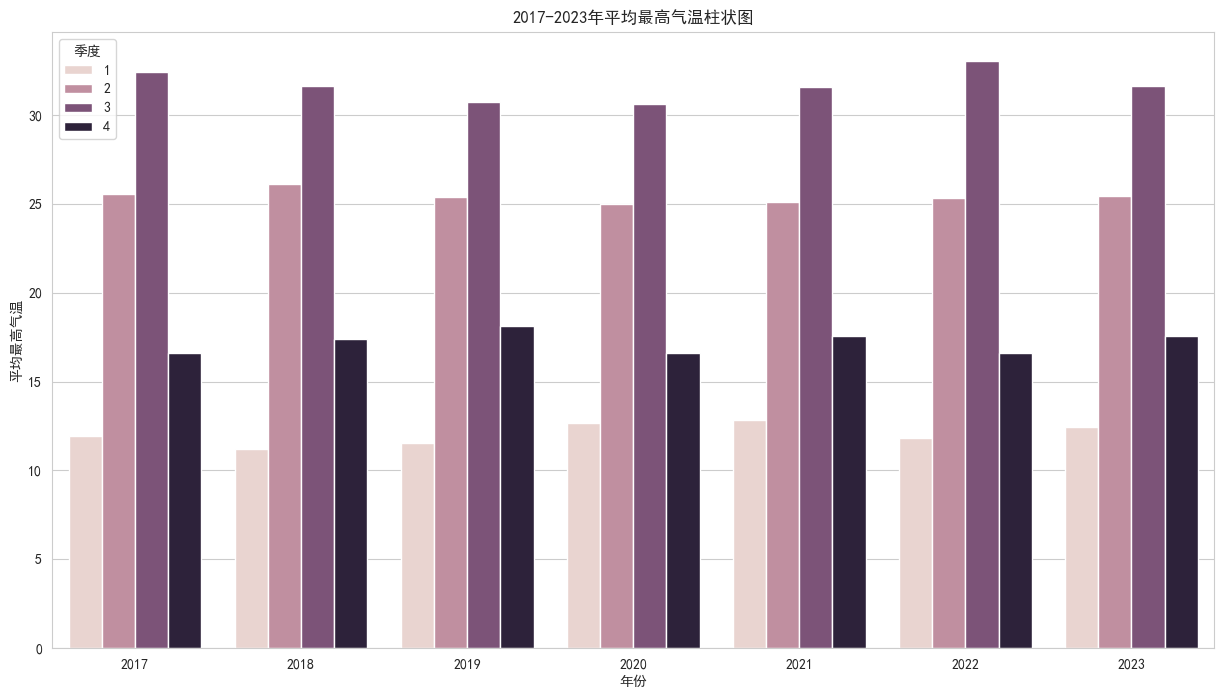

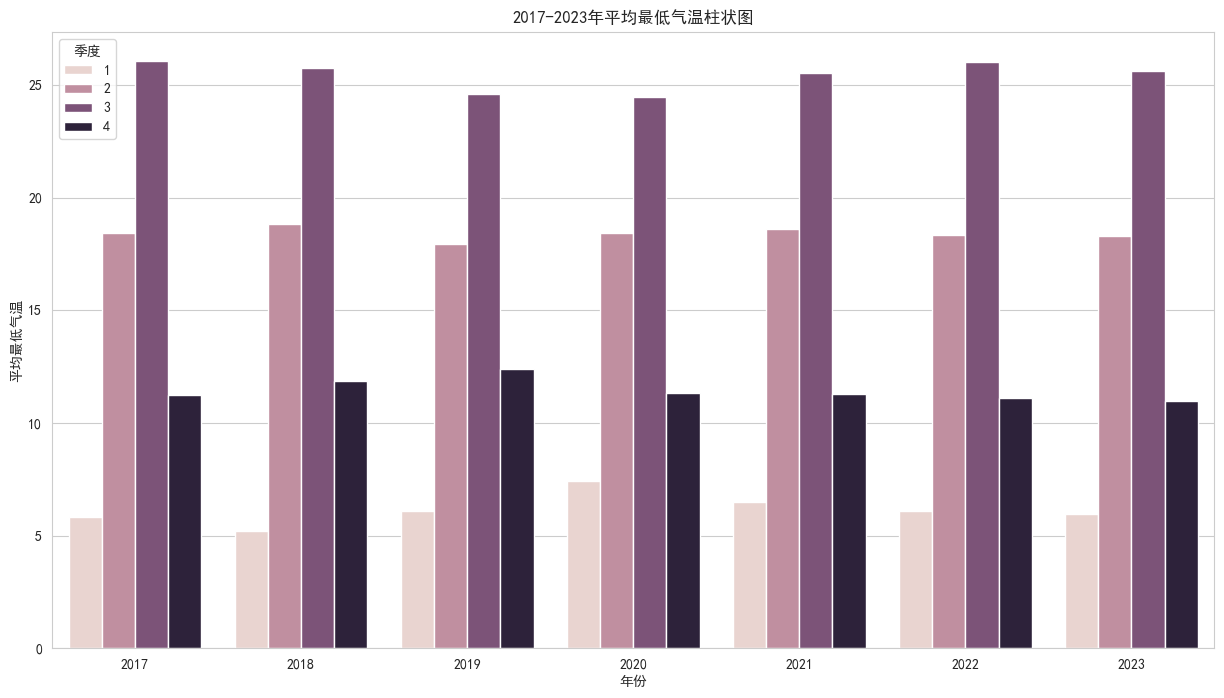

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体为 SimHei，显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 按年份和季度绘制 2017 年至 2023 年平均最高气温和最低气温柱状图
plt.figure(figsize=(15, 8))
sns.barplot(x="year", y="high", hue="quarter", data=df_avg_temp_yearly_quarterly)
plt.title("2017-2023年平均最高气温柱状图")
plt.xlabel("年份")
plt.ylabel("平均最高气温")
plt.legend(title="季度")
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x="year", y="low", hue="quarter", data=df_avg_temp_yearly_quarterly)
plt.title("2017-2023年平均最低气温柱状图")
plt.xlabel("年份")
plt.ylabel("平均最低气温")
plt.legend(title="季度")
plt.show()

最高气温结论：1.平均最高温度排序：第三季度>第二季度>第四季度>第一季度，符合日常生活逻辑

              2.每一年每一季度的平均最低温度基本保持不变，说明数据的准确性


最低气温结论：1.平均最低温度排序：第三季度<第二季度<第四季度<第一季度，符合日常生活逻辑

              2.每一年每一季度的平均最低温度基本保持不变，说明数据的准确性


## 2.天气类型的出现频率

### 2.1 用Matplotlib库完成2018年第一季度天气类型出现频率

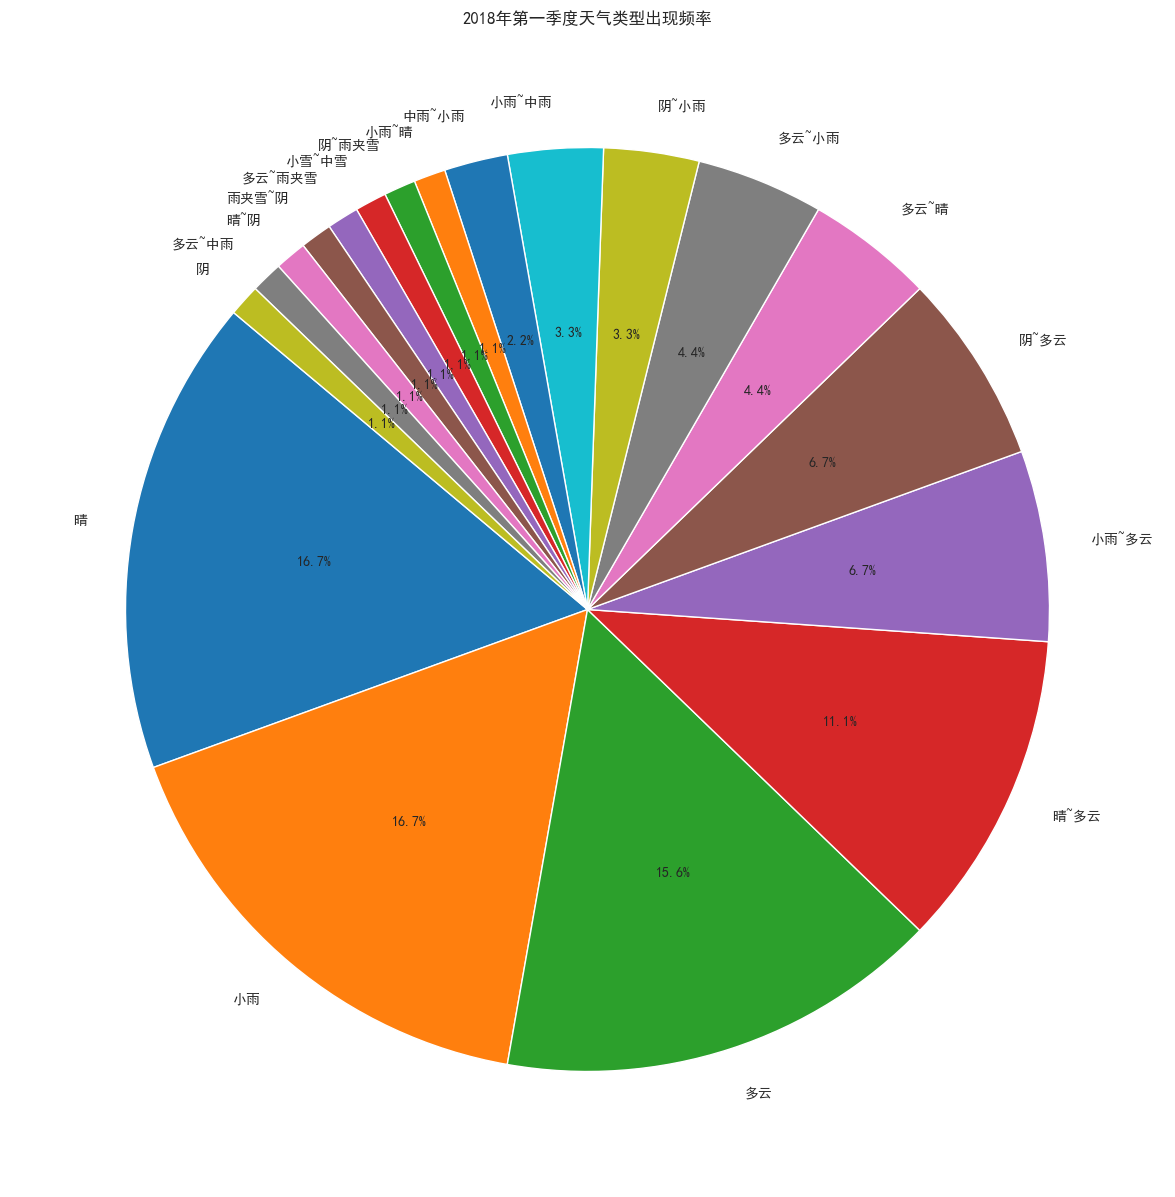

In [112]:
import matplotlib.pyplot as plt

# 设置字体为 SimHei，显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 绘制饼图
plt.figure(figsize=(20,15))
plt.pie(weatherCondition_counts_2018_q1, labels=weatherCondition_counts_2018_q1.index, autopct='%1.1f%%', startangle=140)
plt.title('2018年第一季度天气类型出现频率')
plt.show()

结论：1.晴天和小雨占据着最高的两份16.7%

      2.像是雨夹雪、小雪和大雪等天气出现的频率非常低，符合上海冬天基本不下雪的情况

      3.晴~多云有着50.1%的出现频率，第二高的则是小雨转多云，这表明出现晴天、多云和小雨的情况比较多，佐证了上海属于亚热带季风型气候


### 2.2 使用Matplotlib库完成2018年天气类型的出现频率

<Figure size 1000x600 with 0 Axes>

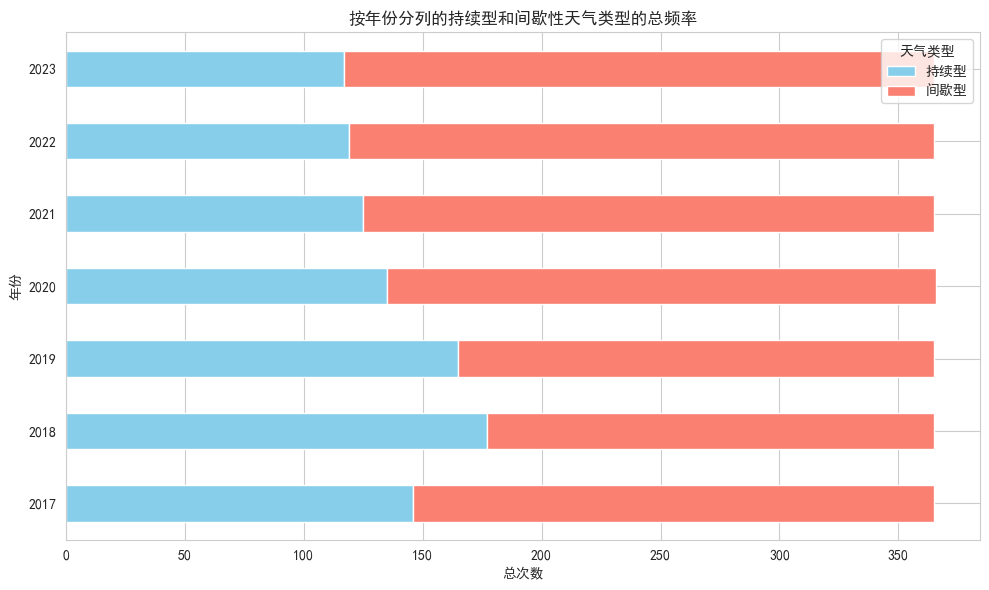

In [113]:
import matplotlib.pyplot as plt

# 设置字体为 SimHei，显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 绘制每年不同天气类型出现的频率，按年份叠加
plt.figure(figsize=(10, 6))
df_weatherType_yearly.plot(kind='barh', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('按年份分列的持续型和间歇性天气类型的总频率')
plt.ylabel('年份')
plt.xlabel('总次数')
plt.legend(title='天气类型', labels=['持续型', '间歇型'])
plt.tight_layout()

plt.show()

结论：1.2018-2019年的持续型和间歇型天气类型的频率基本55开

      2.其他几年都是间歇型天气的占比大，表明上海一年四季的天气变化还是比较大的


### 2.3 用Matplotlib库完成2017-2023年天气类型出现频率

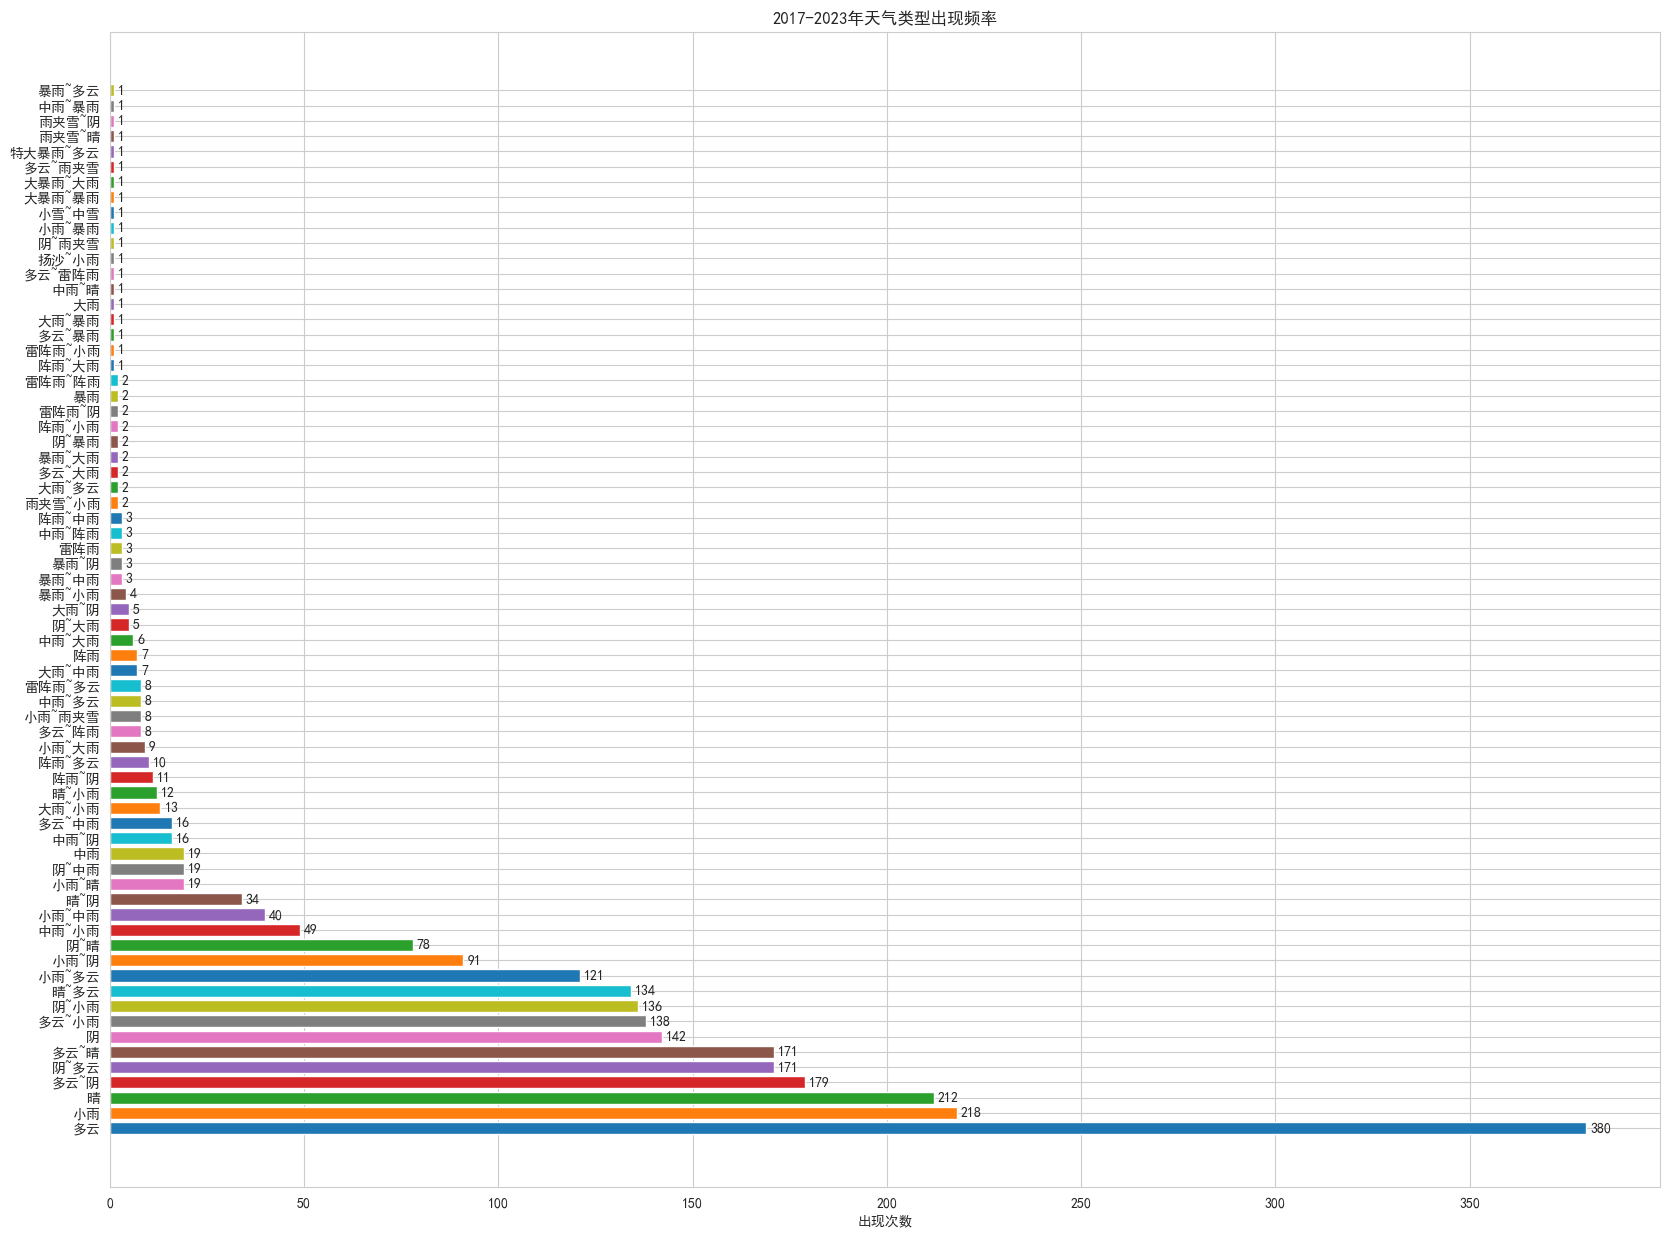

In [114]:
import matplotlib.colors as mcolors

# 设置字体为 SimHei，显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 生成颜色序列
colors = list(mcolors.TABLEAU_COLORS.values())

# 使用条形图来展示，添加颜色变化
plt.figure(figsize=(20,15))
bars = plt.barh(weatherCondition_counts.index, weatherCondition_counts, color=colors)
plt.xlabel('出现次数')
plt.title('2017-2023年天气类型出现频率')

# 在条形图上显示数量
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

plt.show()

结论：1.多云、小雨和晴天以及其混合搭配占据着前七的出现频率

      2.像是雨夹雪和雷阵雨等恶劣天气出现的频率非常低，符合上海冬天基本不下雪以及夏天台风天气基本只持续两三天的情况

      3.无论是看最多的天气出现频率还是极端天气的情况，都毋庸置疑地佐证了上海属于亚热带季风型气候


## 3.不同风向的风力等级分布

### 3.1 用Matplotlib库完成2019年风向统计

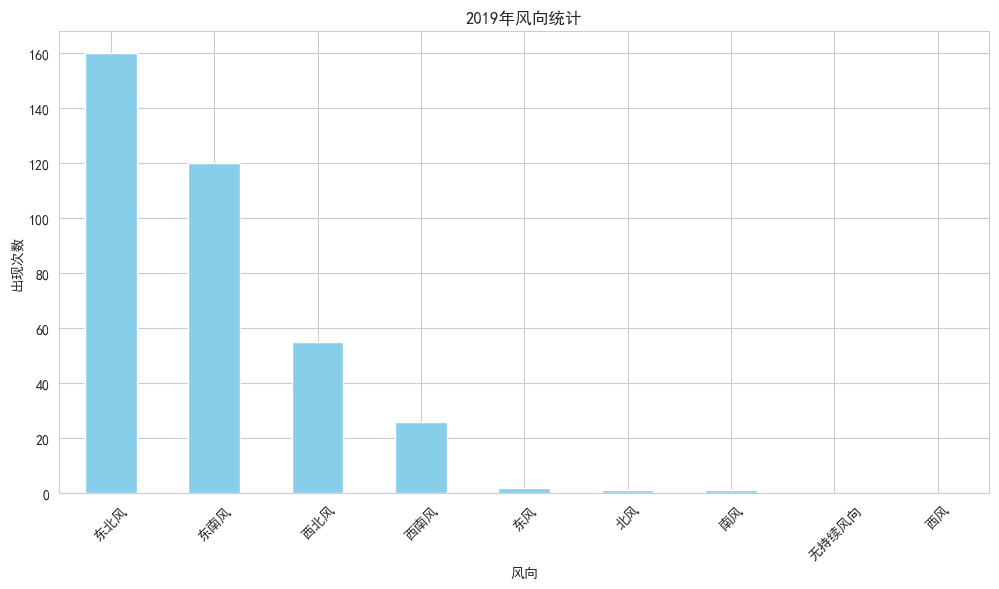

In [115]:
# 绘制风向统计的条形图
plt.figure(figsize=(12, 6))
windDirection_counts_2019.plot(kind='bar', color='skyblue')
plt.title('2019年风向统计')
plt.xlabel('风向')
plt.ylabel('出现次数')
plt.xticks(rotation=45)
plt.show()

结论：1.上海位于中国的东海沿岸，受到东亚季风的影响，这是一个季风性气候的地区。东亚季风分为夏季风和冬季风。

夏季风时，东南风主导。暖湿的季风气流从海洋吹向陆地，导致夏季上海相对潮湿、多雨。
冬季风时，东北风占主导地位。冷而干燥的季风气流从内陆吹向海洋，导致冬季上海相对干燥、较少降水。

2.在上海的气候条件下，西北风和西南风的形成相对较少。冬季，西北风主要在内陆地区形成，而进入上海时，由于受到地形和海洋的影响，其强度相对减弱。
因此，西北风在上海地区并不是主导的气象风向。
而西南风受到季风气流的影响，在上海的气候条件下并不是主导性的风向。


### 3.2 用Matplotlib库显示2019年不同风向下的风力等级

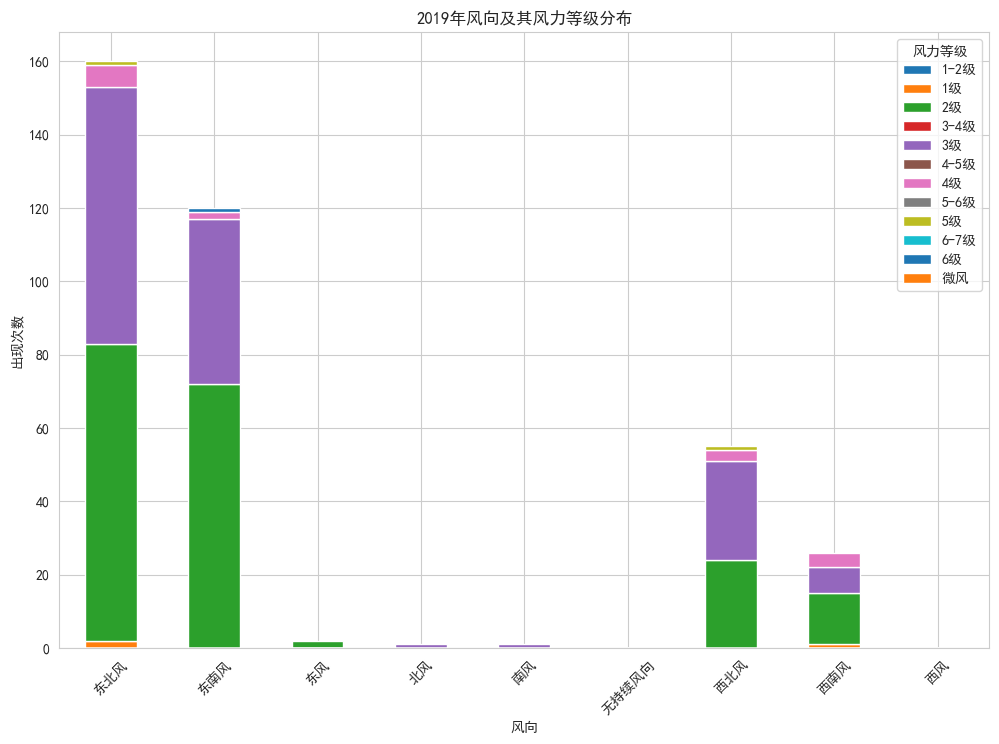

In [116]:
# 绘制堆叠条形图来表示风向和风力等级的关系
windForce_windDirection_counts_2019.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('2019年风向及其风力等级分布')
plt.xlabel('风向')
plt.ylabel('出现次数')
plt.xticks(rotation=45)
plt.legend(title='风力等级')
plt.show()

结论：1.一般来说，上海受到的季风影响不大，毕竟图中显示一般都是2-3级的风力

     2.在地球自转的影响下，大气圈受到科里奥利力的作用，使得风在赤道附近相对较弱，而在高纬度地区较为强烈。
      由于上海位于东海沿岸，地理位置相对较高的经度，这可能导致东北风在这个地区表现为较高的风力。

    3.可以推断的是，在东北风的方向上，可能存在一些大气高压系统，而在东南风的方向上，可能存在一些低压系统


### 3.3 用Seaborn库来显示2019年风力等级和风向的出现次数

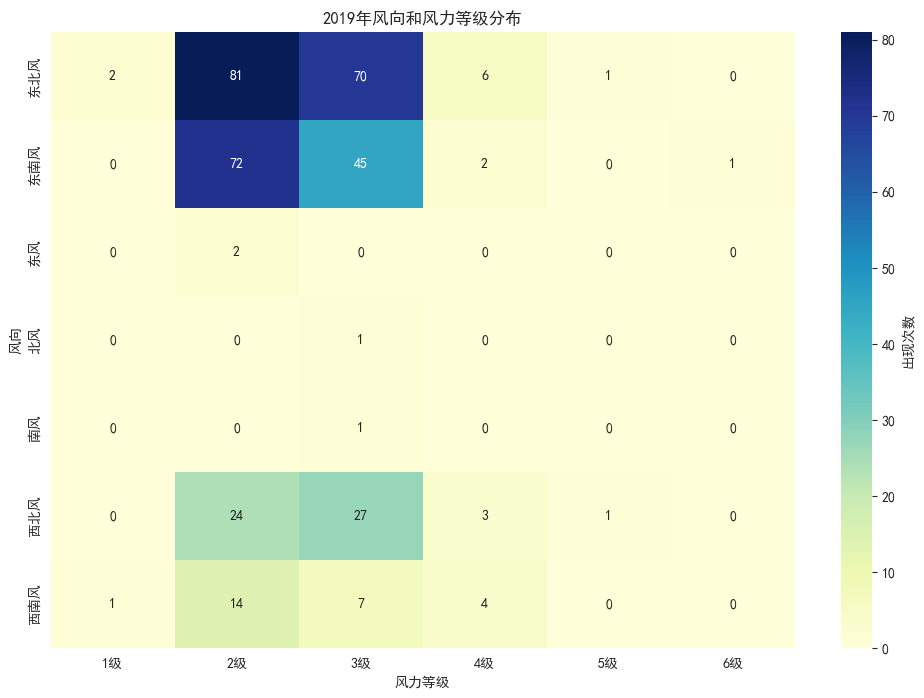

In [117]:
# 使用 Seaborn 库绘制热力图
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='d')
plt.title('2019年风向和风力等级分布')
plt.ylabel('风向')
plt.xlabel('风力等级')

# 在已有的颜色条上添加标签
heatmap.collections[0].colorbar.set_label('出现次数')

plt.show()

结论：1.用seaborn的热力图来展现则更加直观地体现了出现次数与风向和风力等级的关系

## 4.Aqi变化趋势

### 4.1 用pyechart库表示2017-2023年的aqi变化图

In [118]:
# 创建折线图实例
line_chart = Line()

# 添加 x 轴和 y 轴数据
line_chart.add_xaxis(df_aqi['ymd'].dt.strftime('%Y-%m-%d').tolist())
line_chart.add_yaxis("AQI", df_aqi['aqi'].tolist(), label_opts=opts.LabelOpts(is_show=False))

# 设置全局选项
line_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="2017-2023年 AQI 数值变化"),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(type_="value", name="AQI"),
    datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
)

# 生成图表
line_chart.render_notebook()

结论：1.在2018年1月、2021年4月、2023年4月出现了一些较大的aqi数值，但在可允许范围内

     2.近几年上海的aqi数值基本都保持在30~150之间

     3.尤其是这两年的aqi数值，基本都在50上下浮动，可以推断上海市政府加强了有关空气污染的治理


### 4.2 用pyechart库显示2017-2023年的API空气质量情况

In [119]:
from pyecharts.charts import Pie
from pyecharts import options as opts

# 统计 AQI 质量说明的出现次数
aqi_info_counts = df_aqi['aqiInfo'].value_counts()

# 创建饼图实例
pie_chart = Pie()

# 添加数据
pie_chart.add("", [list(z) for z in zip(aqi_info_counts.index.tolist(), aqi_info_counts.values.tolist())])

# 设置全局选项
pie_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="2017-2023年的AQI"),
    legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%")
)

# 设置系列配置和布局
pie_chart.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))

# 在 Jupyter Notebook 中显示图表
pie_chart.render_notebook()

结论：1.显然，上海近几年来的aqi空气质量得到了显著的提升，不像10年以前有那么多雾霾天气

      2.可以推断，近几年上海政府严抓空气质量，也基本实现了优良的结果，守护住了人民的出行健康


### 4.3 用词云图显示2021年的AQI指标

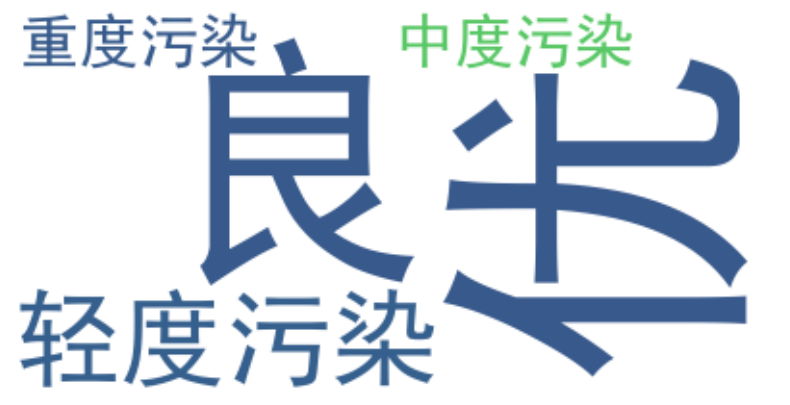

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

# 创建词云实例
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 设置字体格式
    background_color='white',  # 设置背景色
).generate_from_frequencies(aqi_info_counts_2021)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

结论：随机选择一年的AQI空气质量情况，通过词云图发现优>良>轻度污染>中度污染>重度污染，符合先前的数据统计